## The Sparks Foundation - GRIP - Data Science and Business Analytics

## Author: Saurabh Raj

### February 2022

### Task 1 : Prediction using supervised machine learning

#### Predict the percentage score of an student based on the no. of study hours.

### IMPORTING THE REQUIRED LIBRARIES FOR DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
student_df =pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
type(student_df)

pandas.core.frame.DataFrame

In [32]:
student_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [34]:
student_df.isnull().sum()       # checking the presence of null values

Hours     0
Scores    0
dtype: int64

In [36]:
student_df.corr()      # correlation between no. of hours studied and percentage scores.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
student_df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
student_df.shape

(25, 2)

### SCATTER PLOT

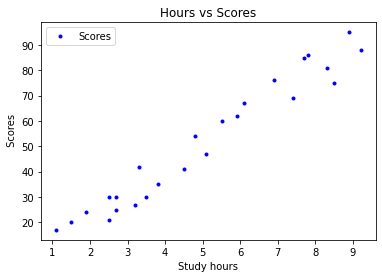

In [9]:
student_df.plot(x='Hours', y='Scores', style='.', color= 'blue')
plt.title('Hours vs Scores')  
plt.xlabel('Study hours')  
plt.ylabel(' Scores')  
plt.show()

### HISTOGRAM

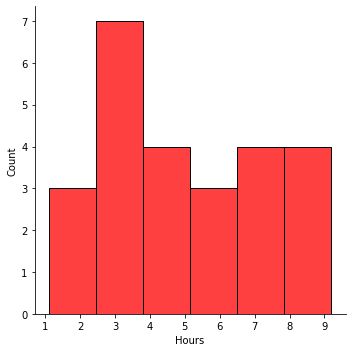

In [10]:
sns.displot(student_df['Hours'],label='hour',color='Red')

In [11]:
x = student_df.iloc[:, :-1].values  
y = student_df.iloc[:, 1].values  
y.shape, x.shape

((25,), (25, 1))

### EVALUATING THE MODEL USING THE TRAIN TEST SPLIT

In [23]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1, random_state=0)

### The class sklearn.linear_model.LinearRegression will be used to perform linear and polynomial regression and make predictions accordingly.

In [24]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

LinearRegression()

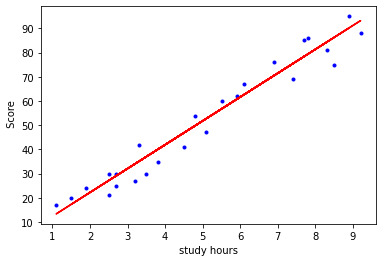

In [30]:
line = reg.coef_ * x + reg.intercept_
plt.scatter(x, y, color='blue', marker='.')
plt.plot(x, line, color= 'red');
plt.xlabel('study hours')  
plt.ylabel(' Score')
plt.show()

### COMPARING ACTUAL VS PREDICTED

In [26]:
y_pred=reg.predict(x_test) 
actual_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_predicted

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


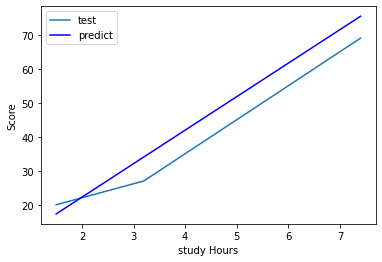

In [27]:
plt.plot(x_test,y_test,label="test")
plt.plot(x_test,y_pred,color="blue",label="predict")
plt.xlabel("study Hours")
plt.ylabel("Score")
leg=plt.legend()
plt.show()

### ACCURACY OF THE MODEL

In [39]:
reg.score(x_test,y_test)

0.9298077534821834

### MAKING PREDICTION ABOUT SCORES FOR STUDYING DIFFERENT NO. OF HOURS

In [40]:
hours = [[2],[5.4],[10],[9.25]]
own_pred = reg.predict(hours)
print("No of Hours studied = {}".format(hours))
print("Predicted Score  = {}".format(own_pred))

No of Hours studied = [[2], [5.4], [10], [9.25]]
Predicted Score  = [ 22.22958753  55.73575592 101.06763081  93.67656425]


### EVALUATING MACHINE LEARNING ALGORITHMS USING METRICS

In [29]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.399450313612012


### SUMMARY : The dataset of hours students study and percentage score , with correlation between scores and hours being 0.976 , which implies a positive linear relationship.

### solution to the problem of predicting the percentage score of a student if he study for 9.25hrs,/day is that he will score 93.67 marks. The accuracy of the model is 92%.